<a href="https://colab.research.google.com/github/Gathoni005/ML_projects/blob/main/customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEALING WITH THE QUESTION OF WHETHER THE CUSTOMER WILL STOP WILL STOP USING THE TELCOM SERVICES BASED ON CERTAIN ATTRIBUTES SUCH AS AGE,MONTHLY CHARGES ETC.BY USING DIFFERENT REGRESSION MODELS AND DETERMING WHICH IS THE BEST FOR USE


LOADING OF THE DATASET


In [117]:
#telling python to bring the pandas library used for data analysis,cleaning and manipulation
import pandas as pd

In [119]:
#mounting my drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
#reading the csv_file by copying the path to store it in a dataframe in this case(customer_df)
customer_df=pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [121]:
#checking the first five entries to observe and check the data
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


DATA ANALYSING

In [122]:
#checking for the number of rows and columns
customer_df.shape

(7043, 21)

In [123]:
#checking for null values
customer_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


according to the results the are no null values in our dataframe.hence no missing or incomplete values across the records

In [124]:
#extracting the summary of the dataframe
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


according to the information collectedthere are 7043 entries(rows) and 21columns.it has also summarized the datatypes of the columns.And the storage used for storing the data.

DATA CLEANING

In [125]:
# Assuming the column name is 'customer_id' instead of 'customerID'
#changing them to integer data type for machine learning
#starting with customer_id since its a combination of integer and sring
#so we remove the string part and replace it with nothing and change the whole of the remaining to type integer
#start by splitting into two part at the hyphen and extracting the first index represented by 0 and keeping it in type int
customer_df['customerID']=customer_df['customerID'].str.split('-').str[0].astype(int)

In [126]:
# Display all columns to check if they match exactly
print("Columns in DataFrame:", customer_df.columns)

Columns in DataFrame: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [127]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [129]:
#using the label encoder method from sklearn.preprocessing to convert categorical values in the dataframe to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines','InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies','Contract',
                    'PaperlessBilling','PaymentMethod', 'Churn']
for col in categorical_cols:
  customer_df[col] = le.fit_transform(customer_df[col])


In [131]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [136]:
#total charges is still in object and because we are sure that there no null values we'll need to check out blank values or empty strings
blank_values = (customer_df['TotalCharges'].str.strip() == '').sum()
print(blank_values)

11


In [155]:
#dealing with the blank values there are several mthods
#decided to replace them with median of the total charges
#converting to numeric to calculate the median so that the calculations are not interruupted with some of the values being blank
customer_df['TotalCharges']=pd.to_numeric(customer_df['TotalCharges'])
#calculation of the median
median_value=customer_df['TotalCharges'].median()
#fill the mean in the blank spaces
customer_df['TotalCharges'].fillna(median_value)

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [156]:
#finding the correlation inorder to know the most unnecessary columns and drop them
customer_df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006073,-0.002197,-0.026779,-0.012816,0.007805,-0.006252,0.004366,-0.012230,0.013174,...,-0.007084,0.001106,-0.007995,-0.016800,0.014765,-0.001904,0.011835,-0.003995,-0.000456,-0.017385
gender,0.006073,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002197,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102411,0.150889
Partner,-0.026779,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.319072,-0.150448
Dependents,-0.012816,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064653,-0.164221
tenure,0.007805,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825880,-0.352229
PhoneService,-0.006252,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113008,0.011942
MultipleLines,0.004366,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.453202,0.038037
InternetService,-0.012230,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175691,-0.047291
OnlineSecurity,0.013174,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254473,-0.289309


In [157]:
#since the customerid has the lowest correlation we have to drop it as a column
customer_df.drop('customerID',axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


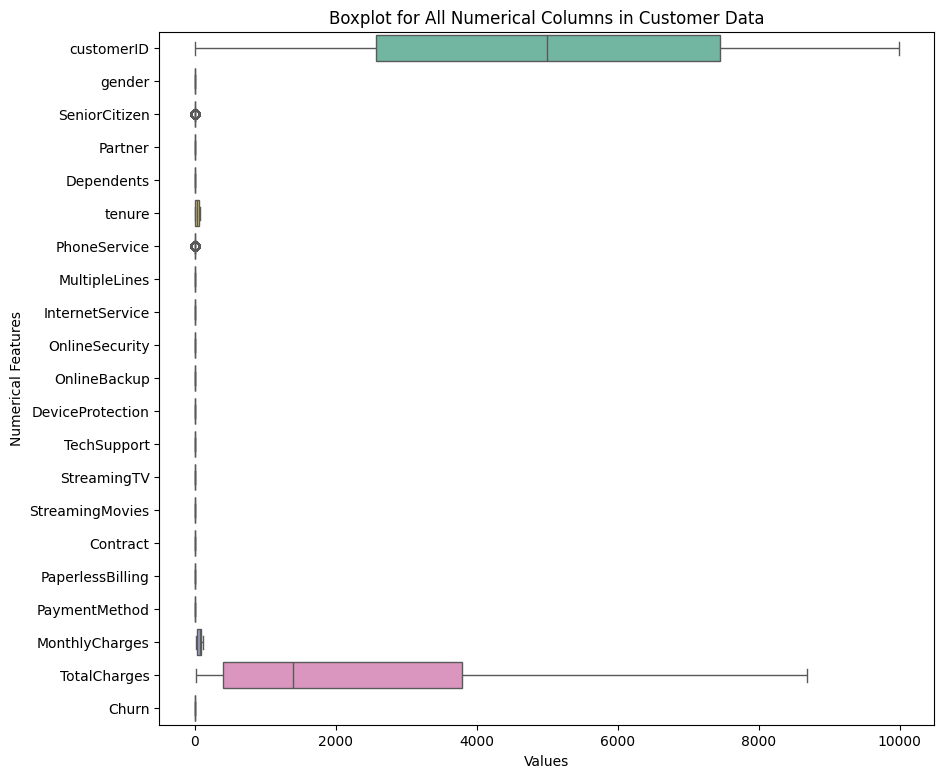

In [158]:
#drawing a scatter plot to identify outliers
#import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 9))
sns.boxplot(data=customer_df, orient="h", palette="Set2")
plt.title("Boxplot for All Numerical Columns in Customer Data")
plt.xlabel("Values")
plt.ylabel("Numerical Features")
plt.show()

CREATION OF MODELS


In [167]:
#splitting of the dataset
#importing the needed libraries
import numpy as np
from sklearn.model_selection import train_test_split
#the code snippet from scikit learn library for logistic regression,decisiontree,gradientboosting and random forest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [169]:
#splitting dataset into features x and y and dropping churn x and targeting variable y containing the churn
X=customer_df.drop(columns=['Churn'])
Y=customer_df['Churn']

In [170]:
#training and splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

LOGISTIC REGRESSION

In [173]:
#creation of the model
model=LogisticRegression()

In [174]:
#fitting of the model
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

PREDICTION OF THE MODEL

In [175]:
y_pred=model.predict(x_test)

EVALUATION METRICS

In [177]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# The confusion matrix shows the counts of True Positives, False Positives, True Negatives, and False Negatives,
# showing predictions versus actual values.

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))
# The classification report provides detailed metrics: precision, recall, and F1-score for each class

# Print the accuracy score
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
# The accuracy score calculates the proportion of correctly predicted instances
# serving as an overall indicator of model performance.


Confusion Matrix:
[[925 111]
 [155 218]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1036
           1       0.66      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

Accuracy Score:
0.8112136266855926


GRADIENT BOOSTING

In [178]:
#initializing gradient boosting model to be used to predict on whether a customer will churn or not
model=GradientBoostingClassifier()

In [180]:
#fitting the model
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [181]:
#the prediction of the model
y_pred=model.predict(x_test)

In [185]:
#print confusion matrix
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))

#print classification report
print("classification report:")
print(classification_report(y_test,y_pred))

#print accuracy score
print("accuracy score:")
print(accuracy_score(y_test,y_pred))

confusion matrix:
[[943  93]
 [181 192]]
classification report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

accuracy score:
0.8055358410220014


RANDOM FOREST

In [188]:
#creation of the model
random_model=RandomForestClassifier()

In [189]:
#fitting of the model
random_model.fit(x_train,y_train)

RandomForestClassifier()

In [190]:
#prediction of the model
y_pred=random_model.predict(x_test)

In [192]:
#print confusion matrix
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))

#print classification report
print("classification report:")
print(classification_report(y_test,y_pred))

#print accuracy score
print("accuracy score:")
print(accuracy_score(y_test,y_pred))

confusion matrix:
[[948  88]
 [183 190]]
classification report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

accuracy score:
0.8076650106458482


DECISION TREE MODEL


In [193]:
#initializing the model
tree_model=DecisionTreeClassifier()

In [194]:
#fitting the model
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [196]:
#prediction of the model
y_pred=tree_model.predict(x_test)


In [197]:
#print the confusion matrix
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))

#print the classification report
print("classification report:")
print(classification_report(y_test,y_pred))

#print the accuracy score
print("accuracy score:")
print(accuracy_score(y_test,y_pred))

confusion matrix:
[[836 200]
 [198 175]]
classification report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.47      0.47      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409

accuracy score:
0.7175301632363378


according to all the information collected the best method would be logistic regression since it has the highest percentage of accuracy compared to the rest with approximately 81%